In [21]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [22]:
IMAGES_DIR = "../data_3/images"
LABELS_DIR = "../data_3/labels"
DIRS = ["train", "test", "val"]

OUTPUT_DIR = "../bounding_box/images"

LABELS = {
    0: "aegypti",
    1: "albopictus",
    2: "anopheles",
    3: "culex",
    4: "culiseta",
    5: "japonicus/koreicus"
}

The total number of training samples: 7500
The different instances present in the training data: {0: 35, 1: 3334, 2: 59, 3: 3312, 4: 460, 5: 300}


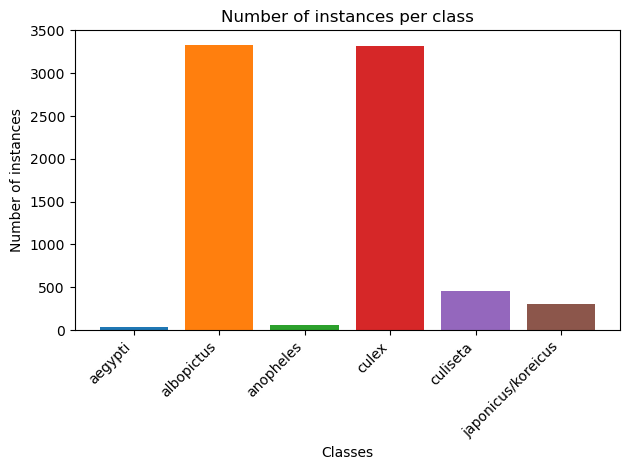

In [23]:
# Open all labels and count the number of each class

def get_labels(dir_type):
    labels = {}
    for file in os.listdir(os.path.join(LABELS_DIR, dir_type)):
        label_txt = np.loadtxt(os.path.join(LABELS_DIR, dir_type, file))
        label_val = label_txt[0].astype(int)
        if label_val in labels:
            labels[label_val] += 1
        else:
            labels[label_val] = 1
    return labels

labels_train = get_labels("train")
labels_val = get_labels("val")

labels_total = {k: labels_train.get(k, 0) + labels_val.get(k, 0) for k in set(labels_train) | set(labels_val)}

print("The total number of training samples:", np.sum(list(labels_total.values())))
print("The different instances present in the training data:", labels_total)

# Plot a histogram of the number of instances per class, give different colors to each class

plt.bar(list(labels_total.keys()), list(labels_total.values()), color=[plt.cm.tab10(i) for i in range(len(labels_total))])

plt.xlabel("Classes")
plt.ylabel("Number of instances")
plt.title("Number of instances per class")

# Put the x-ticks above the bars inside the graph

plt.xticks(list(labels_total.keys()), [LABELS[i] for i in labels_total.keys()], rotation=45, ha="right")
plt.tight_layout()

plt.show()


In [24]:
def put_bounding_box(folder_type, img_name):
    image = cv.imread(os.path.join(IMAGES_DIR, folder_type, img_name))
    label = np.loadtxt(os.path.join(LABELS_DIR, folder_type, img_name.replace(".jpeg", ".txt")))
    
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    cls = LABELS[int(label[0])]
    x, y, w, h = label[1:]
    
    # Convert to bottom left corner
    x = int((x - w/2) * image.shape[1])
    y = int((y - h/2) * image.shape[0])
    
    w = int(w * image.shape[1])
    h = int(h * image.shape[0])
    
    fig, ax = plt.subplots()    
    ax.imshow(image)
    
    rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    ax.text(x, y, cls, color='r')
    
    plt.axis('off')
    plt.tight_layout()
    
    plt.savefig(os.path.join(OUTPUT_DIR, folder_type, img_name), bbox_inches='tight')

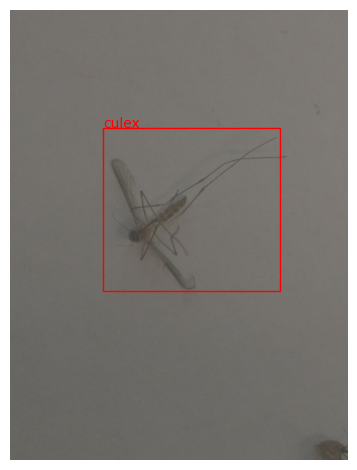

In [25]:
for folder_type in DIRS:
    if folder_type == "test":
        continue
    
    os.makedirs(os.path.join(OUTPUT_DIR, folder_type), exist_ok=True)
    for i, img_name in enumerate(os.listdir(os.path.join(IMAGES_DIR, folder_type))):
        put_bounding_box(folder_type, img_name)
        print(f"{i}, Bounding box added to", img_name)